In [28]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [29]:
df = pd.read_csv('./test_sev.csv')
df.head()

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,TissuePerfusion,SurroundingTissueReaction,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,AppendicitisComplications
0,12.531143,16.494601,male,159.0,41.7,7,5,yes,5.5,no,...,hyperperfused,yes,yes,yes,yes,no,yes,no,no,no
1,12.410678,12.595222,female,152.0,29.1,8,8,yes,8.1,no,...,hyperperfused,yes,yes,yes,yes,no,yes,yes,yes,no
2,10.537988,15.991247,male,133.5,28.5,3,3,yes,6.0,no,...,hyperperfused,no,no,no,no,no,no,yes,no,no
3,10.425736,16.185025,male,146.0,34.5,4,3,yes,6.0,no,...,hyperperfused,no,no,no,no,no,no,no,no,no
4,13.270363,20.449137,female,164.0,55.0,2,2,yes,6.5,no,...,unremarkable,yes,no,no,no,no,no,yes,no,no


In [30]:
df[df.isna().any(axis=1)]

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,TissuePerfusion,SurroundingTissueReaction,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,AppendicitisComplications


In [31]:
print(df.shape)
df = df.dropna()
print(df.shape)
df.head()

(430, 39)
(430, 39)


,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,TissuePerfusion,SurroundingTissueReaction,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,AppendicitisComplications
0,12.531143,16.494601,male,159.0,41.7,7,5,yes,5.5,no,...,hyperperfused,yes,yes,yes,yes,no,yes,no,no,no
1,12.410678,12.595222,female,152.0,29.1,8,8,yes,8.1,no,...,hyperperfused,yes,yes,yes,yes,no,yes,yes,yes,no
2,10.537988,15.991247,male,133.5,28.5,3,3,yes,6.0,no,...,hyperperfused,no,no,no,no,no,no,yes,no,no
3,10.425736,16.185025,male,146.0,34.5,4,3,yes,6.0,no,...,hyperperfused,no,no,no,no,no,no,no,no,no
4,13.270363,20.449137,female,164.0,55.0,2,2,yes,6.5,no,...,unremarkable,yes,no,no,no,no,no,yes,no,no


In [32]:
df['AppendicitisComplications'].value_counts()

AppendicitisComplications
no     379
yes     51
Name: count, dtype: int64

In [ ]:
# Set up Seaborn for better styling
sn.set(style="whitegrid", font="Arial")

for column in df.columns[:-1]:
    if column == 'Gender' or column == 'No of Sonographies' or column == 'Tenderness':
        continue
    plt.figure()
    sn.histplot(df[column], kde=True)
    plt.title(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

xticks  = [['no', 'simple', 'complicated'], ['no', 'yes'],
           ['simple', 'complex', 'other'], ['no', 'yes'],
           None, None, None]
titles = ['Histology', 'Histology Binary', 'Postoperative Diagnosis',
        'Postoperative Diagnosis Binary', 'Gender', 'Tenderness', 'No of Sonographies']

data_paths = ['./report/NO_OS/histology/data.csv',
              './report/NO_OS/histology_binary/data.csv',
              './report/NO_OS/postop/data.csv',
              './report/NO_OS/postop_binary/data.csv']

dfs = pd.concat([pd.read_csv(path).iloc[:, -1] for path in data_paths], axis=1)
dfs = pd.concat([
    dfs,
    pd.read_csv(data_paths[0]).iloc[:, 1],
    pd.read_csv(data_paths[0]).iloc[:, 4],
    pd.read_csv(data_paths[0]).iloc[:, 7]
    ], axis=1).dropna()
print(dfs.head())
datanpy = dfs.to_numpy()

for i in range(len(datanpy[0])):
    plt.figure()
    
    num_bins = len(np.unique(datanpy[:, i]))
    hist_values, bin_edges, _ = plt.hist(datanpy[:, i], bins=num_bins)
    bin_centers = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(num_bins)]
    
    plt.xticks(bin_centers, xticks[i] if xticks[i] is not None else np.unique(datanpy[:, i]).astype(int))
    
    plt.title(titles[i])
    plt.ylabel('Frequency')
    plt.xlabel(titles[i])
    
    plt.ylim(top=550)
    plt.tight_layout()
    
    plt.show()

In [33]:
df.head()

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,TissuePerfusion,SurroundingTissueReaction,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,AppendicitisComplications
0,12.531143,16.494601,male,159.0,41.7,7,5,yes,5.5,no,...,hyperperfused,yes,yes,yes,yes,no,yes,no,no,no
1,12.410678,12.595222,female,152.0,29.1,8,8,yes,8.1,no,...,hyperperfused,yes,yes,yes,yes,no,yes,yes,yes,no
2,10.537988,15.991247,male,133.5,28.5,3,3,yes,6.0,no,...,hyperperfused,no,no,no,no,no,no,yes,no,no
3,10.425736,16.185025,male,146.0,34.5,4,3,yes,6.0,no,...,hyperperfused,no,no,no,no,no,no,no,no,no
4,13.270363,20.449137,female,164.0,55.0,2,2,yes,6.5,no,...,unremarkable,yes,no,no,no,no,no,yes,no,no


In [34]:
print(df.dtypes)

Age                           float64
BMI                           float64
Sex                            object
Height                        float64
Weight                        float64
AlvaradoScore                   int64
PediatricAppendicitisScore      int64
AppendixOnSono                 object
AppendixDiameter              float64
MigratoryPain                  object
LowerAbdominalPainRight        object
ReboundTenderness              object
CoughingPain                   object
PsoasSign                      object
Nausea                         object
AppetiteLoss                   object
BodyTemp                      float64
WBCCount                      float64
NeutrophilPerc                float64
KetonesInUrine                 object
ErythrocytesInUrine            object
WBCInUrine                     object
CRPEntry                      float64
Dysuria                        object
Stool                          object
Peritonitis                    object
FreeFluids  

In [35]:
for col_name in df.columns:
    if df[col_name].dtype == 'object':
        print(df[col_name].value_counts())

Sex
male      231
female    199
Name: count, dtype: int64
AppendixOnSono
yes    277
no     153
Name: count, dtype: int64
MigratoryPain
no     320
yes    110
Name: count, dtype: int64
LowerAbdominalPainRight
yes    417
no      13
Name: count, dtype: int64
ReboundTenderness
no     282
yes    148
Name: count, dtype: int64
CoughingPain
no     313
yes    117
Name: count, dtype: int64
PsoasSign
negative    305
positive    125
Name: count, dtype: int64
Nausea
yes    242
no     188
Name: count, dtype: int64
AppetiteLoss
no     305
yes    125
Name: count, dtype: int64
KetonesInUrine
no     295
+++     74
+       40
++      21
Name: count, dtype: int64
ErythrocytesInUrine
no     360
+       41
+++     18
++      11
Name: count, dtype: int64
WBCInUrine
no     391
+       24
++       8
+++      7
Name: count, dtype: int64
Dysuria
no     408
yes     22
Name: count, dtype: int64
Stool
normal         311
diarrhea        67
obstipation     52
Name: count, dtype: int64
Peritonitis
no             265
lo

In [36]:
from sklearn.preprocessing import MinMaxScaler

def get_norm(df, columns_to_normalize=None, lcn=False):
    df_norm = df.copy()
    # Get the numeric columns
    numeric_columns = df_norm.select_dtypes(include=['float64', 'int64']).iloc[:, :].columns
    
    scaler = MinMaxScaler()

    if lcn is False and numeric_columns[-1] == df_norm.columns[-1]:
        numeric_columns = numeric_columns[:-1]

    print(f'Numeric: {numeric_columns} {df_norm.columns[-1]}')
    
    if columns_to_normalize is None:
        print("Nornalizing")
        df_norm[numeric_columns] = scaler.fit_transform(df_norm[numeric_columns])
    else:
        df_norm.iloc[:, columns_to_normalize] = scaler.fit_transform(df_norm.iloc[:, columns_to_normalize])

    return df_norm

In [16]:
# to_export = df.copy()

# # Diagnosis By Criteria
# encoding_values = {
#     'Sex':
#         {'male': 0, 'female': 1},
#     'AppendixOnSono':
#         {'no': 0, 'yes': 1},
#     'MigratoryPain':
#         {'no': 0, 'yes': 1},
#     'LowerAbdominalPainRight':
#         {'no': 0, 'yes': 1},
#     'ReboundTenderness':
#         {'no': 0, 'yes': 1},
#     'CoughingPain':
#         {'no': 0, 'yes': 1},
#     'PsoasSign':
#         {'negative': 0, 'positive': 1},
#     'Nausea':
#         {'no': 0, 'yes': 1},
#     'AppetiteLoss':
#         {'no': 0, 'yes': 1},
#     'KetonesInUrine':
#         {'no': 0, '+': 1, '++': 2, '+++': 3},
#     'ErythrocytesInUrine':
#         {'no': 0, '+': 1, '++': 2, '+++': 3},
#     'WBCInUrine':
#         {'no': 0, '+': 1, '++': 2, '+++': 3},
#     'Dysuria':
#         {'no': 0, 'yes': 1},
#     'Stool':
#         {'normal': 0, 'diarrhea': 1, 'obstipation': 2},
#     'Peritonitis':
#         {'no': 0, 'local': 1, 'generalised': 2},
#     'FreeFluids':
#         {'no': 0, 'yes': 1},
#     'AppendixWallLayers':
#         {'intakt': 0, 'aufgehoben': 1},
#     'Kokarde':
#         {'no': 0, 'yes': 1},
#     'TissuePerfusion':
#         {'unremarkable': 0, 'hyperperfused': 1, 'hypoperfused': 2},
#     'SurroundingTissueReaction':
#         {'no': 0, 'yes': 1},
#     'PathLymphNodes':
#         {'no': 0, 'yes': 1},
#     'MesentricLymphadenitis':
#         {'no': 0, 'yes': 1},
#     'BowelWallThick':
#         {'no': 0, 'yes': 1},
#     'Ileus':
#         {'no': 0, 'yes': 1},
#     'FecalImpaction':
#         {'no': 0, 'yes': 1},
#     'Meteorism':
#         {'no': 0, 'yes': 1},
#     'Enteritis':
#         {'no': 0, 'yes': 1},
#     'DiagnosisByCriteria':
#         {'noAppendicitis': 0, 'appendicitis': 1}
# }

# to_export = to_export.replace(encoding_values)
# to_export.to_csv('./final/dbc.csv', index=False)
# to_export.head()

# to_export_norm = get_norm(to_export, lcn=False)
# to_export_norm.to_csv('./final/dbc_norm.csv', index=False)
# to_export_norm.head()

Numeric: Index(['Age', 'BMI', 'Sex', 'Height', 'Weight', 'AlvaradoScore',
       'PediatricAppendicitisScore', 'AppendixOnSono', 'AppendixDiameter',
       'MigratoryPain', 'LowerAbdominalPainRight', 'ReboundTenderness',
       'CoughingPain', 'PsoasSign', 'Nausea', 'AppetiteLoss', 'BodyTemp',
       'WBCCount', 'NeutrophilPerc', 'KetonesInUrine', 'ErythrocytesInUrine',
       'WBCInUrine', 'CRPEntry', 'Dysuria', 'Stool', 'Peritonitis',
       'FreeFluids', 'AppendixWallLayers', 'Kokarde', 'TissuePerfusion',
       'SurroundingTissueReaction', 'PathLymphNodes', 'MesentricLymphadenitis',
       'BowelWallThick', 'Ileus', 'FecalImpaction', 'Meteorism', 'Enteritis'],
      dtype='object') DiagnosisByCriteria
Nornalizing


,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,TissuePerfusion,SurroundingTissueReaction,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,DiagnosisByCriteria
0,0.700537,0.285761,0.0,0.782456,0.405648,0.625,0.444444,1.0,0.195804,0.0,...,0.5,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0
1,0.693784,0.157188,1.0,0.733333,0.272631,0.750,0.777778,1.0,0.377622,0.0,...,0.5,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1
2,0.588795,0.269164,0.0,0.603509,0.266297,0.125,0.222222,1.0,0.230769,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.582502,0.275553,0.0,0.691228,0.329638,0.250,0.222222,1.0,0.230769,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.741980,0.416152,1.0,0.817544,0.546054,0.000,0.111111,1.0,0.265734,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [27]:
# to_export = df.copy()

# # Diagnosis By Criteria
# encoding_values = {
#     'Sex':
#         {'male': 0, 'female': 1},
#     'AppendixOnSono':
#         {'no': 0, 'yes': 1},
#     'MigratoryPain':
#         {'no': 0, 'yes': 1},
#     'LowerAbdominalPainRight':
#         {'no': 0, 'yes': 1},
#     'ReboundTenderness':
#         {'no': 0, 'yes': 1},
#     'CoughingPain':
#         {'no': 0, 'yes': 1},
#     'PsoasSign':
#         {'negative': 0, 'positive': 1},
#     'Nausea':
#         {'no': 0, 'yes': 1},
#     'AppetiteLoss':
#         {'no': 0, 'yes': 1},
#     'KetonesInUrine':
#         {'no': 0, '+': 1, '++': 2, '+++': 3},
#     'ErythrocytesInUrine':
#         {'no': 0, '+': 1, '++': 2, '+++': 3},
#     'WBCInUrine':
#         {'no': 0, '+': 1, '++': 2, '+++': 3},
#     'Dysuria':
#         {'no': 0, 'yes': 1},
#     'Stool':
#         {'normal': 0, 'diarrhea': 1, 'obstipation': 2},
#     'Peritonitis':
#         {'no': 0, 'local': 1, 'generalised': 2},
#     'FreeFluids':
#         {'no': 0, 'yes': 1},
#     'AppendixWallLayers':
#         {'intakt': 0, 'aufgehoben': 1},
#     'Kokarde':
#         {'no': 0, 'yes': 1},
#     'TissuePerfusion':
#         {'unremarkable': 0, 'hyperperfused': 1, 'hypoperfused': 2},
#     'SurroundingTissueReaction':
#         {'no': 0, 'yes': 1},
#     'PathLymphNodes':
#         {'no': 0, 'yes': 1},
#     'MesentricLymphadenitis':
#         {'no': 0, 'yes': 1},
#     'BowelWallThick':
#         {'no': 0, 'yes': 1},
#     'Ileus':
#         {'no': 0, 'yes': 1},
#     'FecalImpaction':
#         {'no': 0, 'yes': 1},
#     'Meteorism':
#         {'no': 0, 'yes': 1},
#     'Enteritis':
#         {'no': 0, 'yes': 1},
#     'TreatmentGroupBinar':
#         {'conservative': 0, 'surgical': 1}
# }

# to_export = to_export.replace(encoding_values)
# to_export.to_csv('./final/mgmt.csv', index=False)
# to_export.head()

# to_export_norm = get_norm(to_export, lcn=False)
# to_export_norm.to_csv('./final/mgmt_norm.csv', index=False)
# to_export_norm.head()

Numeric: Index(['Age', 'BMI', 'Sex', 'Height', 'Weight', 'AlvaradoScore',
       'PediatricAppendicitisScore', 'AppendixOnSono', 'AppendixDiameter',
       'MigratoryPain', 'LowerAbdominalPainRight', 'ReboundTenderness',
       'CoughingPain', 'PsoasSign', 'Nausea', 'AppetiteLoss', 'BodyTemp',
       'WBCCount', 'NeutrophilPerc', 'KetonesInUrine', 'ErythrocytesInUrine',
       'WBCInUrine', 'CRPEntry', 'Dysuria', 'Stool', 'Peritonitis',
       'FreeFluids', 'AppendixWallLayers', 'Kokarde', 'TissuePerfusion',
       'SurroundingTissueReaction', 'PathLymphNodes', 'MesentricLymphadenitis',
       'BowelWallThick', 'Ileus', 'FecalImpaction', 'Meteorism', 'Enteritis'],
      dtype='object') TreatmentGroupBinar
Nornalizing


,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,TissuePerfusion,SurroundingTissueReaction,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,TreatmentGroupBinar
0,0.700537,0.285761,0.0,0.782456,0.405648,0.625,0.444444,1.0,0.195804,0.0,...,0.5,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0
1,0.693784,0.157188,1.0,0.733333,0.272631,0.750,0.777778,1.0,0.377622,0.0,...,0.5,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1
2,0.588795,0.269164,0.0,0.603509,0.266297,0.125,0.222222,1.0,0.230769,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.582502,0.275553,0.0,0.691228,0.329638,0.250,0.222222,1.0,0.230769,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.741980,0.416152,1.0,0.817544,0.546054,0.000,0.111111,1.0,0.265734,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [37]:
to_export = df.copy()

# Diagnosis By Criteria
encoding_values = {
    'Sex':
        {'male': 0, 'female': 1},
    'AppendixOnSono':
        {'no': 0, 'yes': 1},
    'MigratoryPain':
        {'no': 0, 'yes': 1},
    'LowerAbdominalPainRight':
        {'no': 0, 'yes': 1},
    'ReboundTenderness':
        {'no': 0, 'yes': 1},
    'CoughingPain':
        {'no': 0, 'yes': 1},
    'PsoasSign':
        {'negative': 0, 'positive': 1},
    'Nausea':
        {'no': 0, 'yes': 1},
    'AppetiteLoss':
        {'no': 0, 'yes': 1},
    'KetonesInUrine':
        {'no': 0, '+': 1, '++': 2, '+++': 3},
    'ErythrocytesInUrine':
        {'no': 0, '+': 1, '++': 2, '+++': 3},
    'WBCInUrine':
        {'no': 0, '+': 1, '++': 2, '+++': 3},
    'Dysuria':
        {'no': 0, 'yes': 1},
    'Stool':
        {'normal': 0, 'diarrhea': 1, 'obstipation': 2},
    'Peritonitis':
        {'no': 0, 'local': 1, 'generalised': 2},
    'FreeFluids':
        {'no': 0, 'yes': 1},
    'AppendixWallLayers':
        {'intakt': 0, 'aufgehoben': 1},
    'Kokarde':
        {'no': 0, 'yes': 1},
    'TissuePerfusion':
        {'unremarkable': 0, 'hyperperfused': 1, 'hypoperfused': 2},
    'SurroundingTissueReaction':
        {'no': 0, 'yes': 1},
    'PathLymphNodes':
        {'no': 0, 'yes': 1},
    'MesentricLymphadenitis':
        {'no': 0, 'yes': 1},
    'BowelWallThick':
        {'no': 0, 'yes': 1},
    'Ileus':
        {'no': 0, 'yes': 1},
    'FecalImpaction':
        {'no': 0, 'yes': 1},
    'Meteorism':
        {'no': 0, 'yes': 1},
    'Enteritis':
        {'no': 0, 'yes': 1},
    'AppendicitisComplications':
        {'no': 0, 'yes': 1}
}

to_export = to_export.replace(encoding_values)
to_export.to_csv('./final/sev.csv', index=False)
to_export.head()

to_export_norm = get_norm(to_export, lcn=False)
to_export_norm.to_csv('./final/sev_norm.csv', index=False)
to_export_norm.head()

Numeric: Index(['Age', 'BMI', 'Sex', 'Height', 'Weight', 'AlvaradoScore',
       'PediatricAppendicitisScore', 'AppendixOnSono', 'AppendixDiameter',
       'MigratoryPain', 'LowerAbdominalPainRight', 'ReboundTenderness',
       'CoughingPain', 'PsoasSign', 'Nausea', 'AppetiteLoss', 'BodyTemp',
       'WBCCount', 'NeutrophilPerc', 'KetonesInUrine', 'ErythrocytesInUrine',
       'WBCInUrine', 'CRPEntry', 'Dysuria', 'Stool', 'Peritonitis',
       'FreeFluids', 'AppendixWallLayers', 'Kokarde', 'TissuePerfusion',
       'SurroundingTissueReaction', 'PathLymphNodes', 'MesentricLymphadenitis',
       'BowelWallThick', 'Ileus', 'FecalImpaction', 'Meteorism', 'Enteritis'],
      dtype='object') AppendicitisComplications
Nornalizing


,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,TissuePerfusion,SurroundingTissueReaction,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,AppendicitisComplications
0,0.700537,0.285761,0.0,0.782456,0.405648,0.625,0.444444,1.0,0.195804,0.0,...,0.5,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0
1,0.693784,0.157188,1.0,0.733333,0.272631,0.750,0.777778,1.0,0.377622,0.0,...,0.5,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2,0.588795,0.269164,0.0,0.603509,0.266297,0.125,0.222222,1.0,0.230769,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.582502,0.275553,0.0,0.691228,0.329638,0.250,0.222222,1.0,0.230769,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.741980,0.416152,1.0,0.817544,0.546054,0.000,0.111111,1.0,0.265734,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [ ]:
# to_export = df.copy()

# # Histology No, Yes
# encoding_values = {
#     'Gender':
#         {'male': 0, 'female': 1},
#     'Tenderness':
#         {'none': 0, 'local': 1, 'diffuse': 2},
#     'Type of Surgery':
#         {'open': 0, 'laparoscopy': 1, 'conversion': 2},
#     'Histology Binary':
#         {'no': 0, 'yes': 1}
# }

# to_export = to_export.replace(encoding_values)
# to_export.to_csv('./final/histology_binary.csv', index=False)
# to_export.head()

# export_norm(to_export, './final/histology_binary_norm.csv', [0, 2, 3, 5, 6, 7, 8])

In [ ]:
# to_export = df.copy()

# # Histology No, Simple, Complicated
# encoding_values = {
#     'Gender':
#         {'male': 0, 'female': 1},
#     'Tenderness':
#         {'none': 0, 'local': 1, 'diffuse': 2},
#     'Type of Surgery':
#         {'open': 0, 'laparoscopy': 1, 'conversion': 2},
#     'Histology':
#         {'no': 0, 'simple': 1, 'complicated': 2}
# }

# to_export = to_export.replace(encoding_values)
# to_export.to_csv('./final/histology_multiclass.csv', index=False)
# to_export.head()

# export_norm(to_export, './final/histology_multiclass_norm.csv', [0, 2, 3, 5, 6, 7, 8])

In [ ]:
# to_export = df.copy()

# # Simple, Complex
# encoding_values = {
#     'Gender':
#         {'male': 0, 'female': 1},
#     'Tenderness':
#         {'none': 0, 'local': 1, 'diffuse': 2},
#     'Type of Surgery':
#         {'open': 0, 'laparoscopy': 1, 'conversion': 2},
#     'Postoperative Diagnosis':
#         {'simple': 0, 'complex': 1, 'complex and abscess': 1, 'perforated': 1, 'gangranos': 1}
# }

# to_export = to_export.replace(encoding_values)
# # to_export.to_csv('./final/postop_binary.csv', index=False)
# to_export

# # export_norm(to_export, './final/postop_binary_norm.csv', [0, 2, 3, 5, 6, 7, 8])

In [ ]:
# to_export = df.copy()

# # Simple, Complex, Other
# encoding_values = {
#     'Gender':
#         {'male': 0, 'female': 1},
#     'Tenderness':
#         {'none': 0, 'local': 1, 'diffuse': 2},
#     'Type of Surgery':
#         {'open': 0, 'laparoscopy': 1, 'conversion': 2},
#     'Postoperative Diagnosis':
#         {'simple': 0, 'complex': 1, 'complex and abscess': 1, 'perforated': 2, 'gangranos': 2}
# }

# to_export = to_export.replace(encoding_values)
# to_export.to_csv('./final/postop_spl_cplx_othr.csv', index=False)
# to_export.head()

# export_norm(to_export, './final/postop_spl_cplx_othr_norm.csv', [0, 2, 3, 5, 6, 7, 8])

In [ ]:
# to_export = df.copy()

# # Simple, Complex, Complex and abscess, Perforated, Gangranos
# encoding_values = {
#     'Gender':
#         {'male': 0, 'female': 1},
#     'Tenderness':
#         {'none': 0, 'local': 1, 'diffuse': 2},
#     'Type of Surgery':
#         {'open': 0, 'laparoscopy': 1, 'conversion': 2},
#     'Postoperative Diagnosis':
#         {'simple': 0, 'complex': 1, 'complex and abscess': 2, 'perforated': 3, 'gangranos': 4}
# }

# to_export = to_export.replace(encoding_values)
# to_export.to_csv('./final/postop_multiclass.csv', index=False)
# print(to_export.head())

# export_norm(to_export, './final/postop_multiclass_norm.csv', [0, 2, 3, 5, 6, 7, 8])

In [17]:
to_export.iloc[:, -1].value_counts()

DiagnosisByCriteria
1    246
0    184
Name: count, dtype: int64

In [38]:
corr_matrix_pearson = to_export.corr(method='pearson')
corr_matrix_spearman = to_export.corr(method='spearman')

<Axes: >

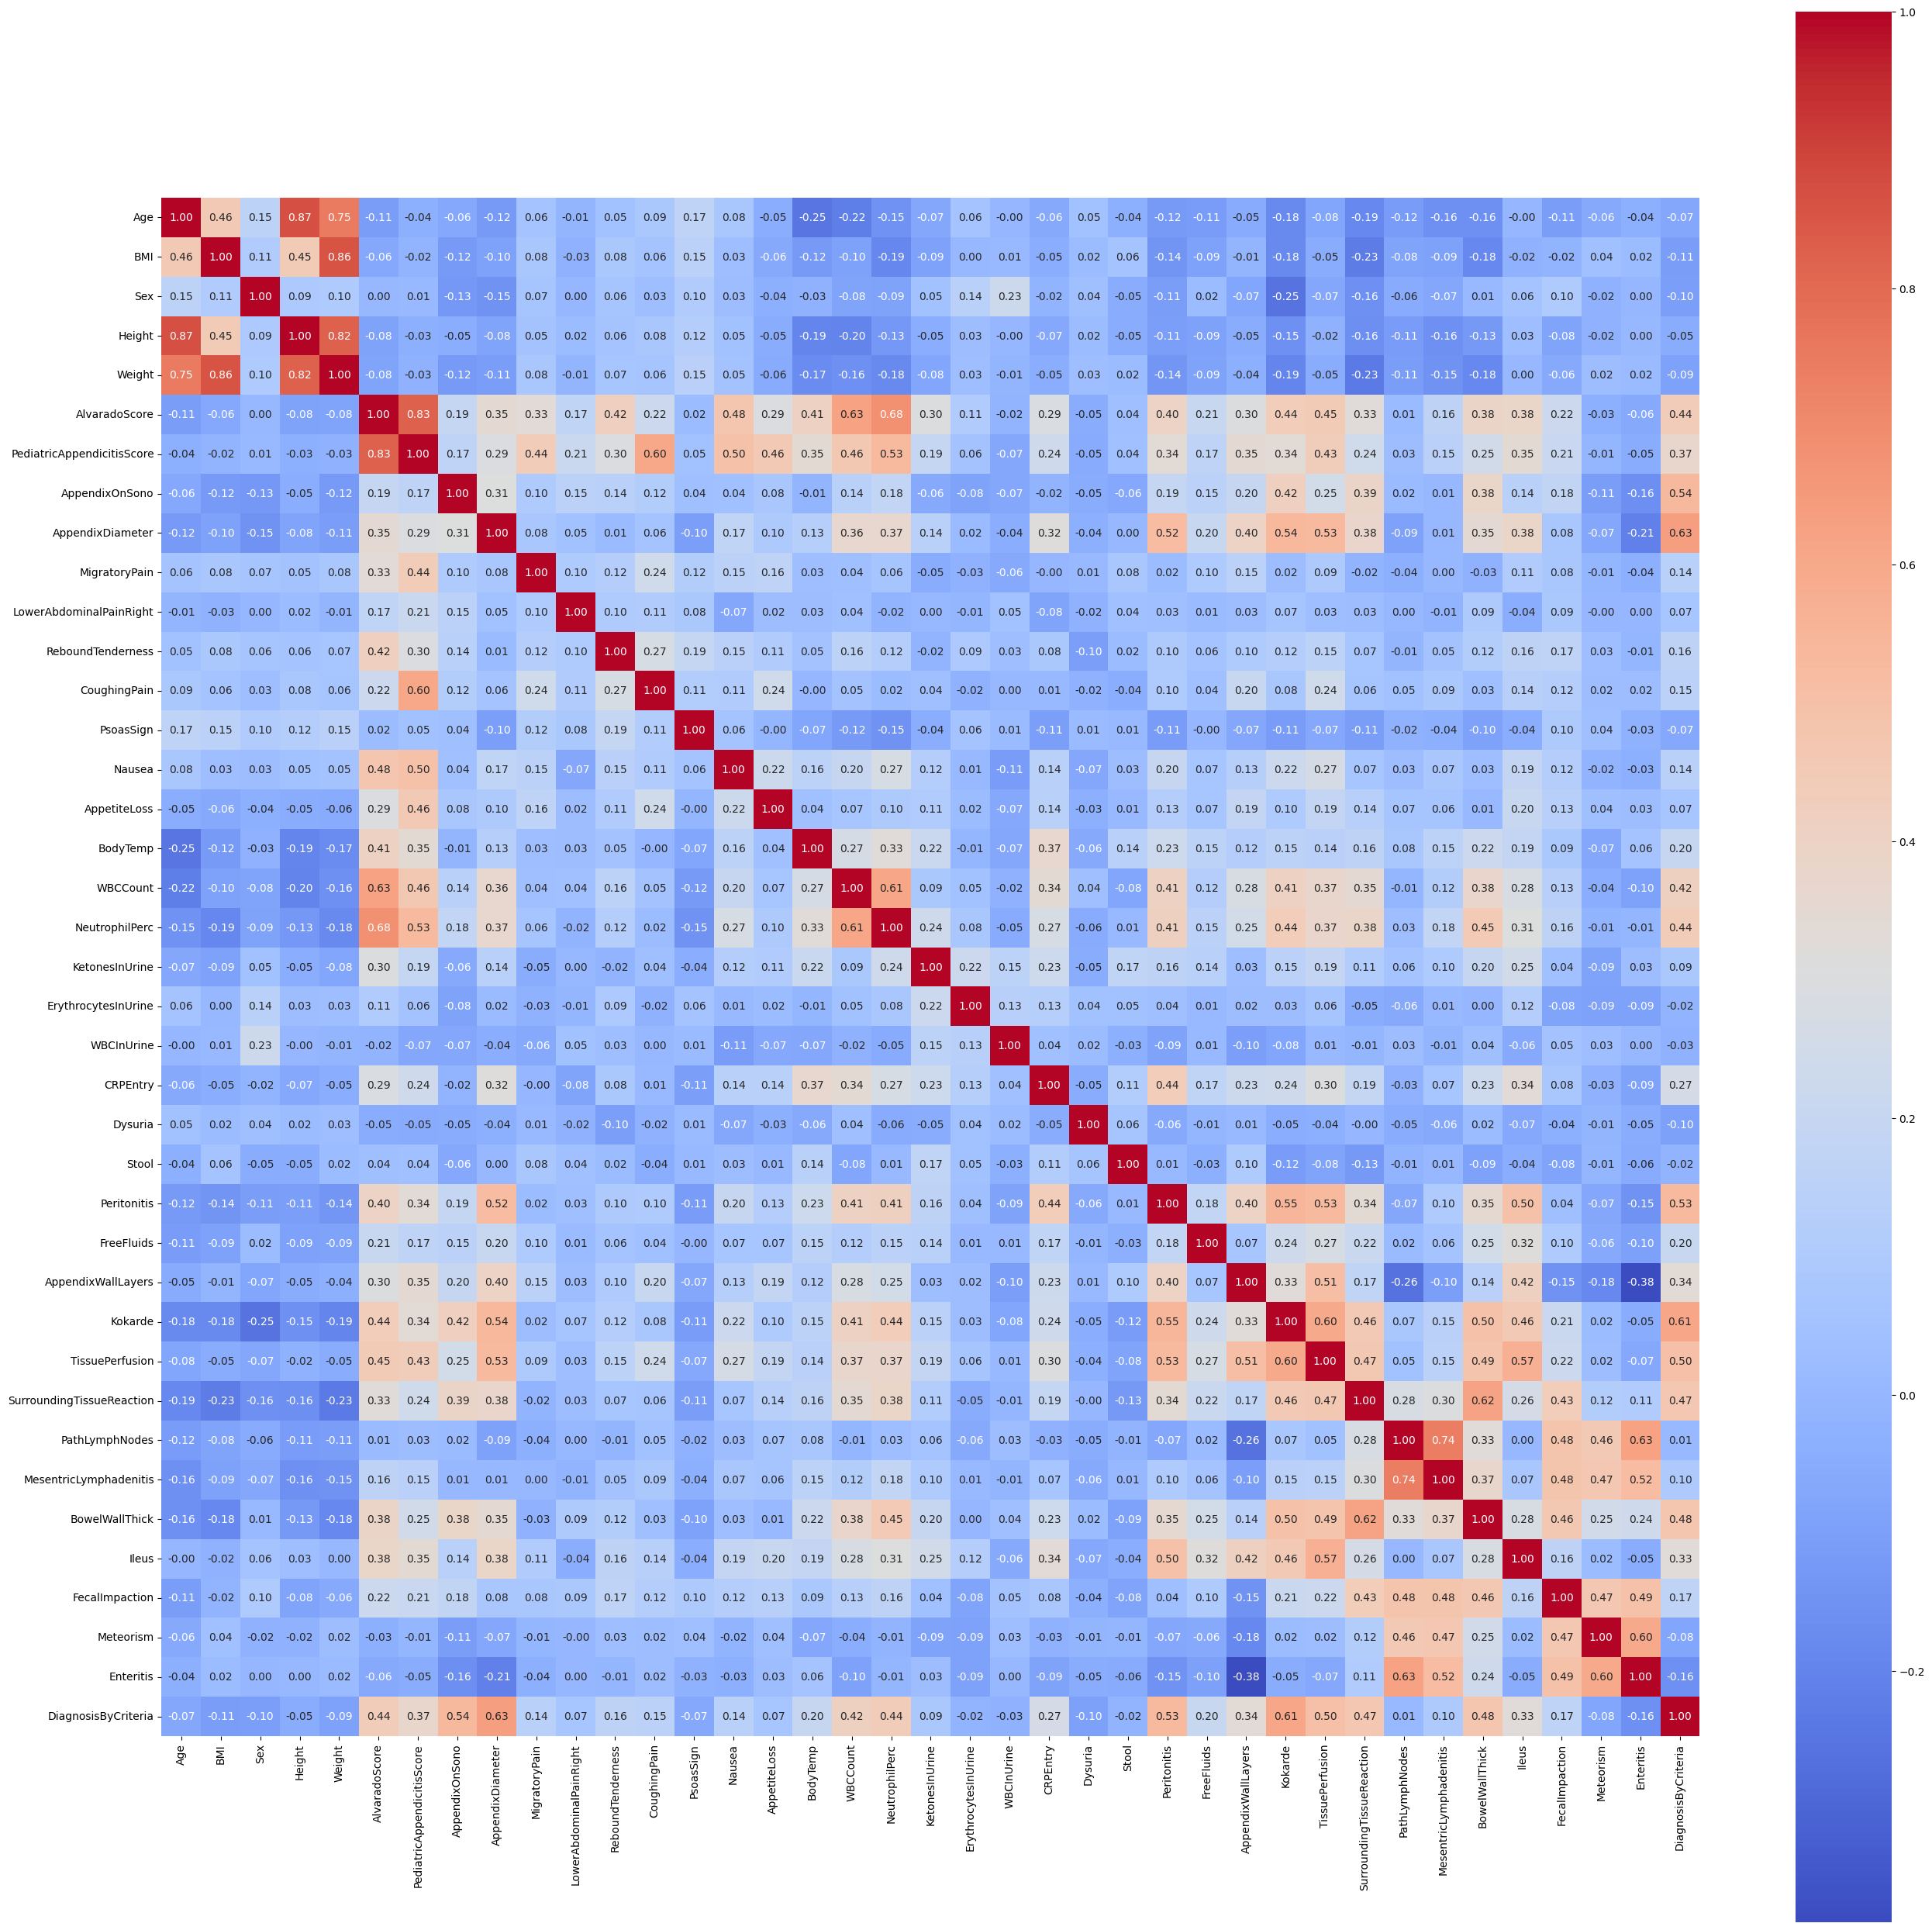

In [57]:
fig = plt.figure(figsize=(32, 32))
ax = fig.add_subplot(111)

sn.heatmap(corr_matrix_pearson, annot=True, fmt=".2f", cmap="coolwarm", square=True, ax=ax)


<Axes: >

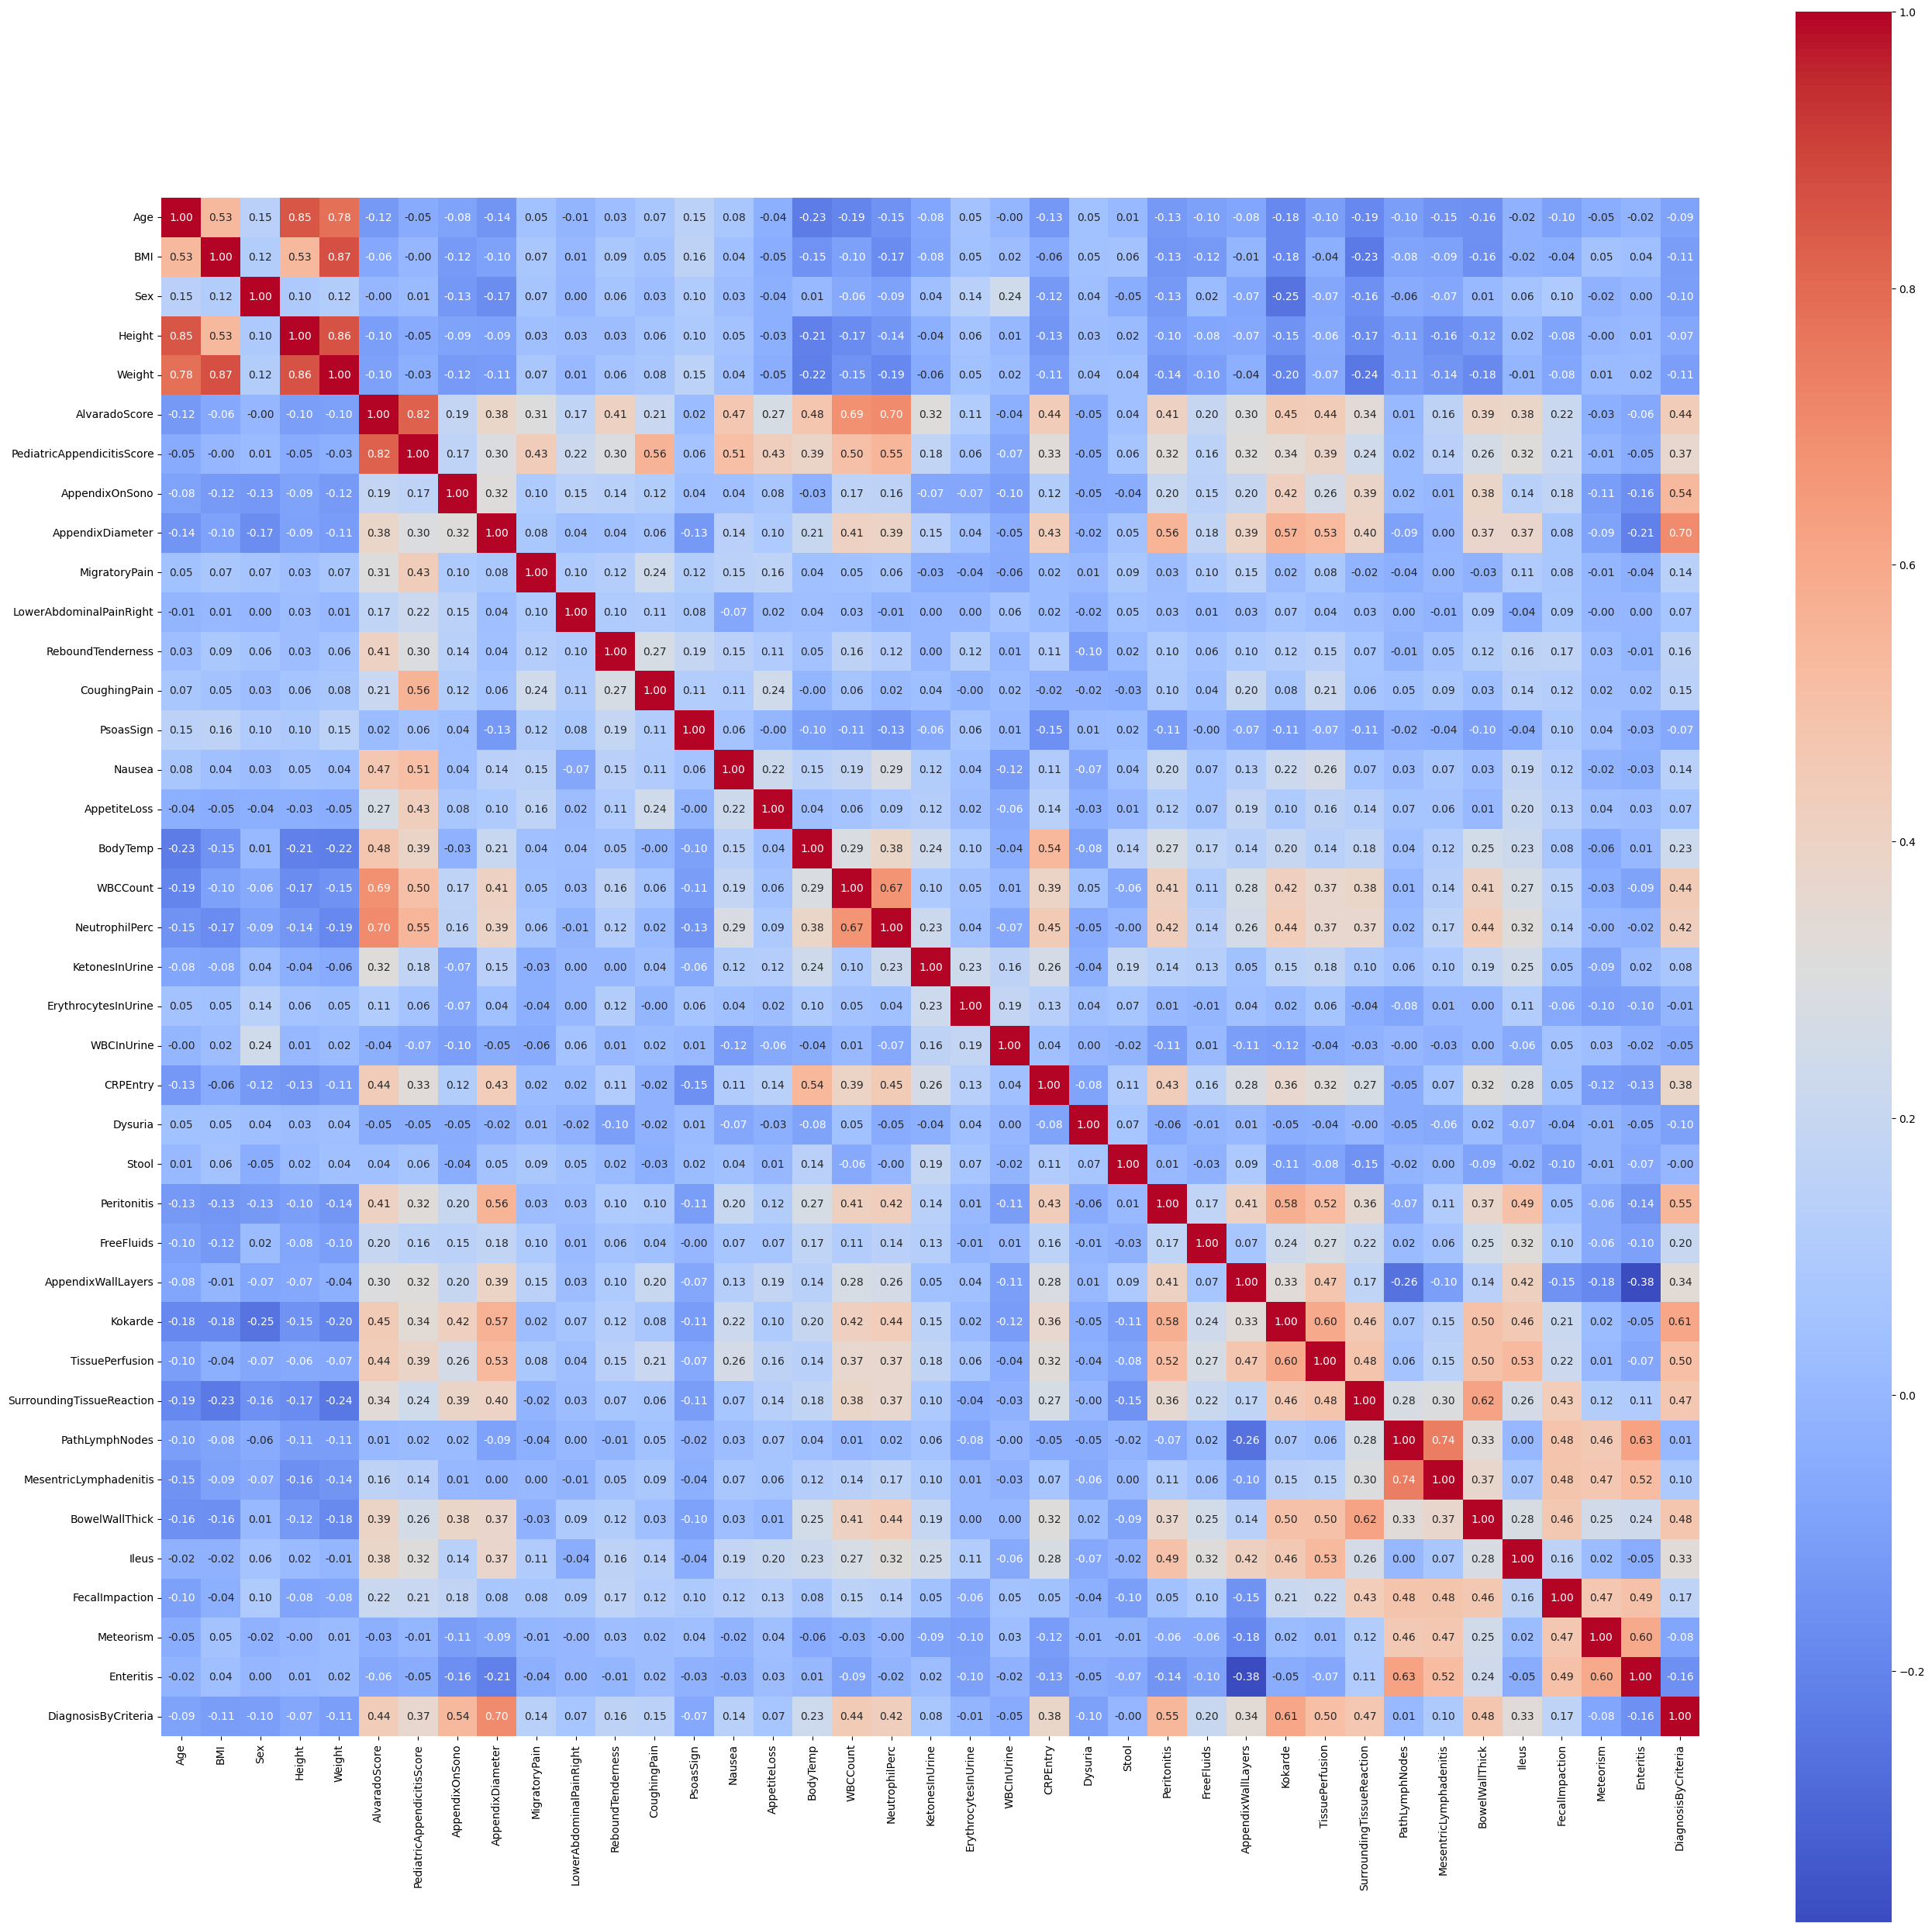

In [58]:
fig = plt.figure(figsize=(32, 32))
ax = fig.add_subplot(111)

sn.heatmap(corr_matrix_spearman, annot=True, fmt=".2f", cmap="coolwarm", square=True, ax=ax)

In [53]:
to_export.describe()

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,TissuePerfusion,SurroundingTissueReaction,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,DiagnosisByCriteria
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,...,430.00000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,11.360081,18.976406,0.462791,148.420930,43.632174,5.723256,4.953488,0.644186,7.169535,0.255814,...,0.67907,0.686047,0.851163,0.897674,0.639535,0.144186,0.751163,0.920930,0.848837,0.572093
std,3.416111,4.295955,0.499194,19.956526,17.038258,2.142949,1.986592,0.479317,2.339541,0.436826,...,0.75062,0.464638,0.356343,0.303429,0.480695,0.351687,0.432843,0.270162,0.358625,0.495352
min,0.035592,7.827983,0.000000,47.500000,3.275000,2.000000,1.000000,0.000000,2.700000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.333333,15.845389,0.000000,138.000000,31.125000,4.000000,4.000000,0.000000,5.225000,0.000000,...,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,11.509925,18.143691,0.000000,150.500000,42.000000,6.000000,5.000000,1.000000,6.700000,0.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,13.913073,21.244624,1.000000,162.875000,55.000000,7.000000,6.000000,1.000000,8.700000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,17.872690,38.156221,1.000000,190.000000,98.000000,10.000000,10.000000,1.000000,17.000000,1.000000,...,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from scipy.stats import shapiro

df = pd.read_csv('./report/NO_OS/postop_binary/data.csv')

for i in range(len(df.columns)):
    stat, p = shapiro(df.iloc[:, i])
    maybe = 'not ' if p <= 0.05 else ''
    print(f'{df.columns[i]} - stat={stat:.2f}, p={p:.2f} - probably {maybe} normal')
    
stat, p = shapiro(np.random.normal(size=100))
maybe = 'not ' if p <= 0.05 else ''
print(f'CHECK - stat={stat:.2f}, p={p:.2f} - probably {maybe} normal')